<a href="https://colab.research.google.com/github/ainurafifah00/Computer_Vision/blob/master/Intro_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This is based on the tutorial by Machine Learning Mastery, 'Crash Course for Computer Vision'

##Normalizing Image data

Images are made up of matrices of pixels. Pixels are often integers in the range between 0 and 255. 

What we are doing in this phase is to normalize the value of the pixels so it will be presented in a value between 0 and 1.

This normalization method on the pixel values will reduce the computation time of the training model. 

In [0]:
from numpy import asarray
from PIL import Image
from IPython import display

!wget -O bondi_beach.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTeq1_pzpDttAN5jpbBTNzTCVfygogO4z-s2XYNxBT8d4sbaDmA&usqp=CAU 

--2020-04-09 05:36:54--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTeq1_pzpDttAN5jpbBTNzTCVfygogO4z-s2XYNxBT8d4sbaDmA
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 173.194.216.102, 173.194.216.100, 173.194.216.101, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|173.194.216.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9894 (9.7K) [image/jpeg]
Saving to: ‘bondi_beach.jpg’

bondi_beach.jpg     100%[===================>]   9.66K  --.-KB/s    in 0s      

2020-04-09 05:36:54 (85.4 MB/s) - ‘bondi_beach.jpg’ saved [9894/9894]



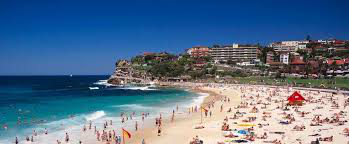

In [0]:
image = Image.open('bondi_beach.jpg')
image

In [0]:
pixels = asarray(image)

print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000


In [0]:
pixels = pixels.astype('float32') #convert integers into float32
pixels /= 255.0
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Min: 0.000, Max: 1.000


##Convolutional Neural Networks

Convolutional Neural Networks or CNN is constructed of Convolutional, Pooling and Classifier Layers. 

***Convolutional layers*** act as a filter for an input that results an activation. Repeated usage of this layer to an input results in a map of activations, which is also called a feature map. 

***Pooling layers*** downsample the feature maps by summarizing the presence of features in patches.

After the features are extracted, they can be interpreted and used to make prediction using ***classifier layer***. 

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#create model
model = Sequential()

#add convolutional layer

model.add(Conv2D(32, (3,3), input_shape=(256, 256, 1)))  #This model expects grayscale images with square size 256x256 pixels,
                                                         #with one convolutional layer with 32 filters, each with 3x3 pixels
                                                         #with one binary output
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 246017    
Total params: 264,833
Trainable params: 264,833
Non-trainable params: 0
________________________________________________

##Image Classification

In this exercise, we will download a picture of a dog from the internet and load it using keras load_img() function. 

Instead of building a CNN model from scratch and train it on our own will require a large dataset as well as longer training time. What we will do in this section is to re-use the model weights from pre-trained models that were developed by someone else for standard computer vision datasets, namely like the ImageNet.

Anyway, we'll save a lot of time and there's no need to find a large dataset for training. 

The example below uses the VGG-16 pre-trained model to classify photographs of objects into one of 1,000 known classes

In [0]:
#!wget -O dog.jpg https://machinelearningmastery.com/wp-content/uploads/2019/02/dog.jpg
#!wget -O dog.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQKwJ-qhzhFX196eWbAp8JA0Usb-cSjcXu92C13RszCKSKL-jI4&usqp=CAU
!wget -O dog.jpg https://boygeniusreport.files.wordpress.com/2016/11/puppy-dog.jpg?quality=98&strip=all&w=782

--2020-04-09 13:57:30--  https://boygeniusreport.files.wordpress.com/2016/11/puppy-dog.jpg?quality=98
Resolving boygeniusreport.files.wordpress.com (boygeniusreport.files.wordpress.com)... 192.0.72.18, 192.0.72.19
Connecting to boygeniusreport.files.wordpress.com (boygeniusreport.files.wordpress.com)|192.0.72.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 293338 (286K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>] 286.46K  --.-KB/s    in 0.05s   

2020-04-09 13:57:31 (5.72 MB/s) - ‘dog.jpg’ saved [293338/293338]



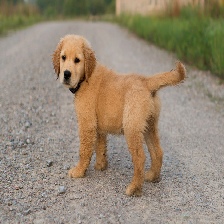

In [0]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16

image = load_img('dog.jpg', target_size=(224,224))
image

In [0]:
image = img_to_array(image)
image

array([[[ 82.,  82.,  58.],
        [ 91.,  85.,  59.],
        [ 91.,  85.,  59.],
        ...,
        [159., 124.,  66.],
        [150., 116.,  53.],
        [141., 112.,  46.]],

       [[ 88.,  84.,  57.],
        [ 96.,  87.,  58.],
        [ 97.,  87.,  60.],
        ...,
        [156., 126.,  64.],
        [149., 120.,  54.],
        [135., 111.,  39.]],

       [[ 91.,  85.,  63.],
        [ 98.,  86.,  60.],
        [ 99.,  87.,  61.],
        ...,
        [151., 126.,  59.],
        [142., 119.,  52.],
        [129., 112.,  40.]],

       ...,

       [[132., 126., 126.],
        [161., 146., 143.],
        [155., 145., 143.],
        ...,
        [177., 168., 159.],
        [159., 148., 144.],
        [179., 172., 166.]],

       [[103.,  87.,  88.],
        [149., 150., 144.],
        [155., 159., 160.],
        ...,
        [152., 147., 143.],
        [165., 164., 159.],
        [168., 161., 153.]],

       [[139., 131., 128.],
        [148., 148., 136.],
        [150., 1

In [0]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
image

array([[[[-45.939003 , -34.779    , -41.68     ],
         [-44.939003 , -31.779    , -32.68     ],
         [-44.939003 , -31.779    , -32.68     ],
         ...,
         [-37.939003 ,   7.2210007,  35.32     ],
         [-50.939003 ,  -0.7789993,  26.32     ],
         [-57.939003 ,  -4.7789993,  17.32     ]],

        [[-46.939003 , -32.779    , -35.68     ],
         [-45.939003 , -29.779    , -27.68     ],
         [-43.939003 , -29.779    , -26.68     ],
         ...,
         [-39.939003 ,   9.221001 ,  32.32     ],
         [-49.939003 ,   3.2210007,  25.32     ],
         [-64.939    ,  -5.7789993,  11.32     ]],

        [[-40.939003 , -31.779    , -32.68     ],
         [-43.939003 , -30.779    , -25.68     ],
         [-42.939003 , -29.779    , -24.68     ],
         ...,
         [-44.939003 ,   9.221001 ,  27.32     ],
         [-51.939003 ,   2.2210007,  18.32     ],
         [-63.939003 ,  -4.7789993,   5.3199997]],

        ...,

        [[ 22.060997 ,   9.221001 ,   

In [0]:
#load model
model = VGG16()

#predict probability accross all output classes
yhat = model.predict(image)

#convert the probabilities to class labels
label = decode_predictions(yhat)

#retrieve the most likely result
label = label[0][0]

#print classification 
print('%s (%.2f%%)' %(label[1], label[2]*100))

golden_retriever (71.44%)


##Train Image Classification Model

In this section, we'll build and train a CNN model. The dataset used is Fashion MNIST. It is a dataset comprised of 60,000 small square 28 × 28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more.

The steps in this segment are:


1.   Load the dataset
2.   Scales the pixel values
3.   Fits a CNN on the training dataset
4.   Evaluate the performance of the network on test dataset

Sounds pretty simple, innit?



In [47]:
#import libraries
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

#load dataset and split into training and testing dataset according to feature X and label Y
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [48]:
trainX

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [49]:
trainY

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [52]:
#reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainX

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [0]:
#convert from integers into float
trainX, testX = trainX.astype('float32'), testX.astype('float32')

#normalize to range 0-1
trainX, testX = trainX / 255.0, testX / 255.0

#one-hot encode target labels
trainY, testY = to_categorical(trainY), to_categorical(testY)

In [0]:
#define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
#fit model
model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
1875/1875 - 23s - loss: 2.3028 - accuracy: 0.0978
Epoch 2/10
1875/1875 - 22s - loss: 2.3028 - accuracy: 0.0968
Epoch 3/10
1875/1875 - 22s - loss: 2.3028 - accuracy: 0.0985
Epoch 4/10
1875/1875 - 22s - loss: 2.3027 - accuracy: 0.0996
Epoch 5/10
1875/1875 - 22s - loss: 2.3028 - accuracy: 0.0998
Epoch 6/10
1875/1875 - 22s - loss: 2.3028 - accuracy: 0.0994
Epoch 7/10
1875/1875 - 22s - loss: 2.3028 - accuracy: 0.0984
Epoch 8/10
1875/1875 - 22s - loss: 2.3028 - accuracy: 0.0983
Epoch 9/10
1875/1875 - 22s - loss: 2.3027 - accuracy: 0.0990
Epoch 10/10
1875/1875 - 22s - loss: 2.3028 - accuracy: 0.0980


In [59]:
#evaluate model
loss, acc = model.evaluate(testX, testY, verbose=0)
print(loss, acc)

2.3026363849639893 0.10000000149011612


If we add an extra Dense Layer with 100 units, let's see the difference in result

In [0]:
#define second model
model2 = Sequential()
model2.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(10, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
#fit second model
model2.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
1875/1875 - 30s - loss: 2.3028 - accuracy: 0.0975
Epoch 2/10
1875/1875 - 29s - loss: 2.3028 - accuracy: 0.0994
Epoch 3/10
1875/1875 - 29s - loss: 2.3028 - accuracy: 0.1003
Epoch 4/10
1875/1875 - 29s - loss: 2.3028 - accuracy: 0.0992
Epoch 5/10
1875/1875 - 29s - loss: 2.3028 - accuracy: 0.0976
Epoch 6/10
1875/1875 - 29s - loss: 2.3028 - accuracy: 0.0975
Epoch 7/10
1875/1875 - 29s - loss: 2.3028 - accuracy: 0.0999
Epoch 8/10
1875/1875 - 29s - loss: 2.3028 - accuracy: 0.0980
Epoch 9/10
1875/1875 - 29s - loss: 2.3028 - accuracy: 0.0964
Epoch 10/10
1875/1875 - 29s - loss: 2.3028 - accuracy: 0.0972


In [62]:
#evaluate second model
loss, acc = model2.evaluate(testX, testY, verbose=0)
print(loss, acc)

2.3026158809661865 0.10000000149011612


Same, no difference. Lol.